In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', header=None)

In [3]:
df.columns = ['age','sex','cp','restbp','chol', 'fbs','restecg','thalach','exang','oldpeak','slope','ca', 'thal','hd']

In [5]:
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    float64
 1   sex      303 non-null    float64
 2   cp       303 non-null    float64
 3   restbp   303 non-null    float64
 4   chol     303 non-null    float64
 5   fbs      303 non-null    float64
 6   restecg  303 non-null    float64
 7   thalach  303 non-null    float64
 8   exang    303 non-null    float64
 9   oldpeak  303 non-null    float64
 10  slope    303 non-null    float64
 11  ca       303 non-null    object 
 12  thal     303 non-null    object 
 13  hd       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [7]:
df['ca'] = pd.to_numeric(df['ca'], errors='coerce')

In [8]:
df['thal'] = pd.to_numeric(df['thal'], errors='coerce')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    float64
 1   sex      303 non-null    float64
 2   cp       303 non-null    float64
 3   restbp   303 non-null    float64
 4   chol     303 non-null    float64
 5   fbs      303 non-null    float64
 6   restecg  303 non-null    float64
 7   thalach  303 non-null    float64
 8   exang    303 non-null    float64
 9   oldpeak  303 non-null    float64
 10  slope    303 non-null    float64
 11  ca       299 non-null    float64
 12  thal     301 non-null    float64
 13  hd       303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [10]:
df['ca'] = df['ca'].fillna(df['ca'].median())
df['thal'] = df['thal'].fillna(df['thal'].median())

In [11]:
df.ca.unique()

array([0., 3., 2., 1.])

In [12]:
df.thal.unique()

array([6., 3., 7.])

In [13]:
df.columns

Index(['age', 'sex', 'cp', 'restbp', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'hd'],
      dtype='object')

<Axes: xlabel='hd', ylabel='thalach'>

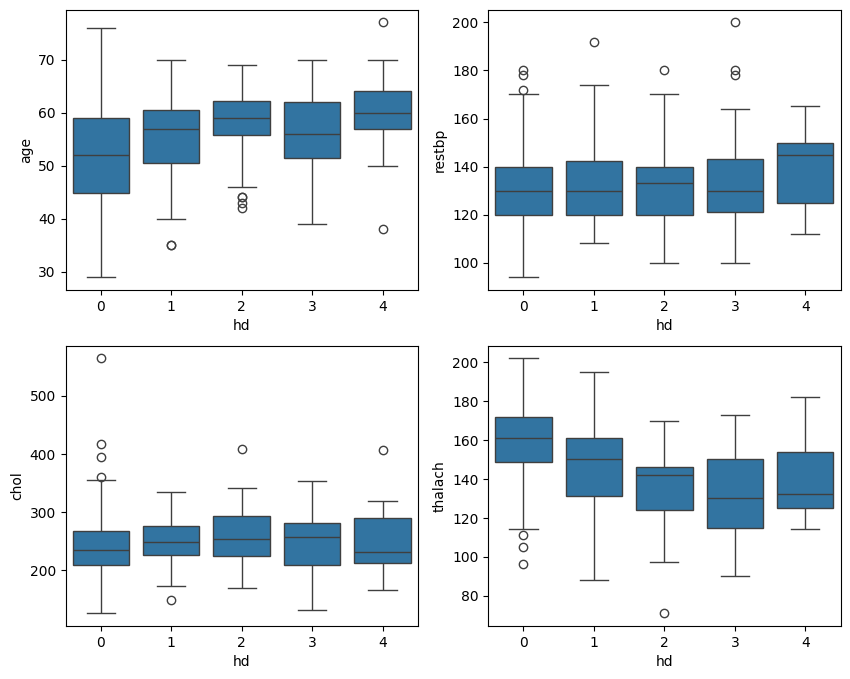

In [14]:
## data exploration
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10,8))
sns.boxplot(x='hd', y='age', data=df, ax=ax1)
sns.boxplot(x='hd', y='restbp', data=df, ax=ax2)
sns.boxplot(x='hd', y='chol', data=df, ax=ax3)
sns.boxplot(x='hd', y='thalach', data=df, ax=ax4)

In [15]:
df.groupby('hd').count()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
hd,,,,,,,,,,,,,
0,164,164,164,164,164,164,164,164,164,164,164,164,164
1,55,55,55,55,55,55,55,55,55,55,55,55,55
2,36,36,36,36,36,36,36,36,36,36,36,36,36
3,35,35,35,35,35,35,35,35,35,35,35,35,35
4,13,13,13,13,13,13,13,13,13,13,13,13,13


In [16]:
mapping = {0:0, 1:1, 2:1, 3:1, 4:1}
df['binary_hd'] = df['hd'].map(mapping)

In [17]:
df.groupby('binary_hd').count()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
binary_hd,,,,,,,,,,,,,,
0,164,164,164,164,164,164,164,164,164,164,164,164,164,164
1,139,139,139,139,139,139,139,139,139,139,139,139,139,139


<Axes: xlabel='binary_hd', ylabel='thalach'>

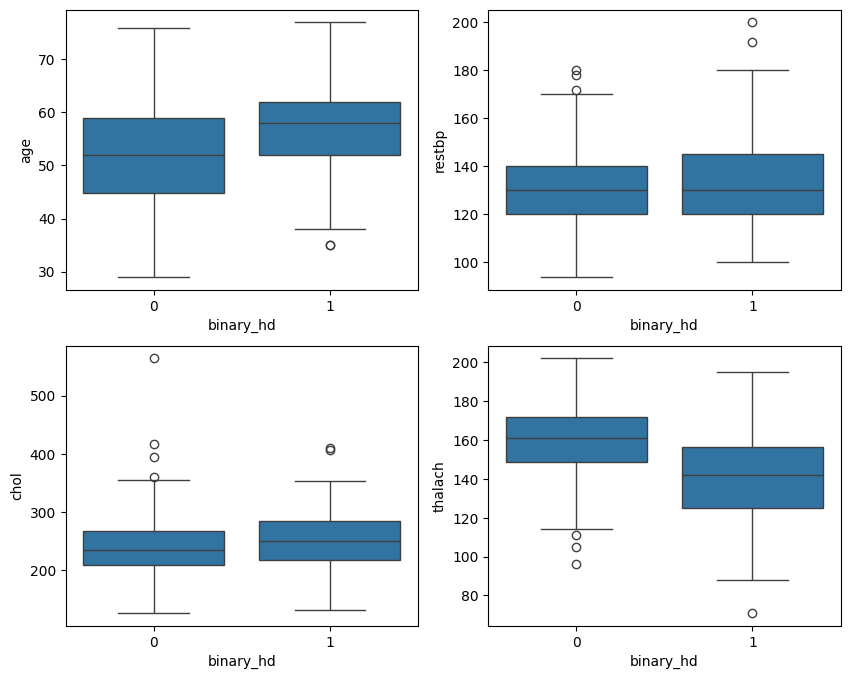

In [18]:
## data exploration
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10,8))
sns.boxplot(x='binary_hd', y='age', data=df, ax=ax1)
sns.boxplot(x='binary_hd', y='restbp', data=df, ax=ax2)
sns.boxplot(x='binary_hd', y='chol', data=df, ax=ax3)
sns.boxplot(x='binary_hd', y='thalach', data=df, ax=ax4)

<Axes: xlabel='binary_hd'>

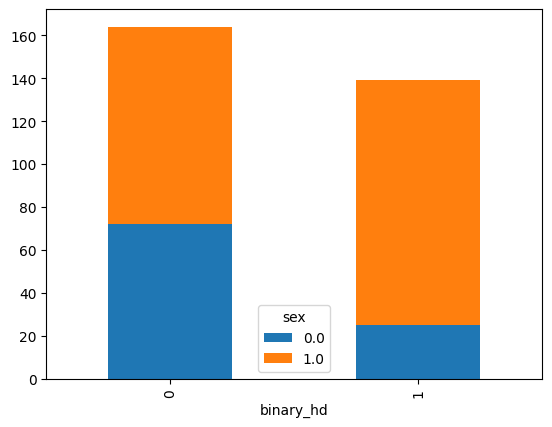

In [19]:
df.groupby(['binary_hd','sex'])['age'].count().unstack().plot(kind='bar', stacked=True)

<Axes: xlabel='binary_hd'>

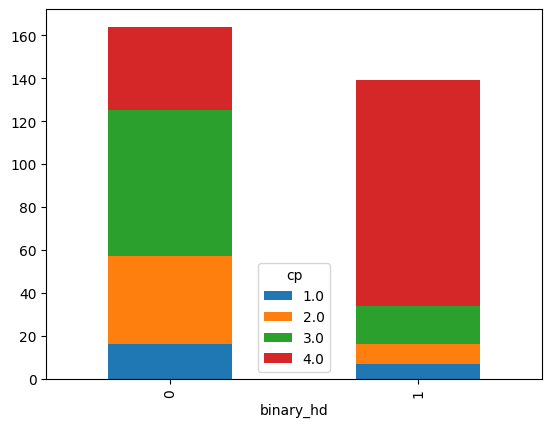

In [20]:
df.groupby(['binary_hd','cp'])['age'].count().unstack().plot(kind='bar', stacked=True)

<Axes: xlabel='binary_hd'>

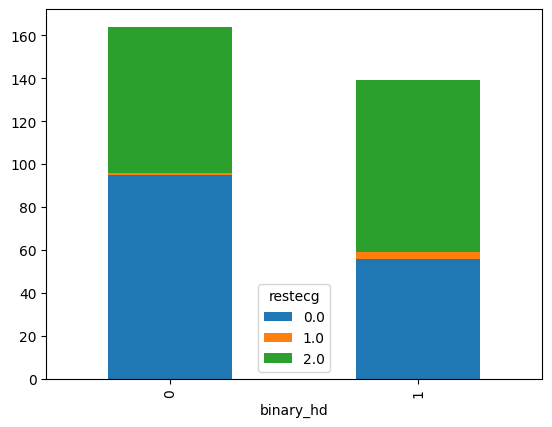

In [21]:
df.groupby(['binary_hd','restecg'])['age'].count().unstack().plot(kind='bar', stacked=True)

<Axes: xlabel='binary_hd'>

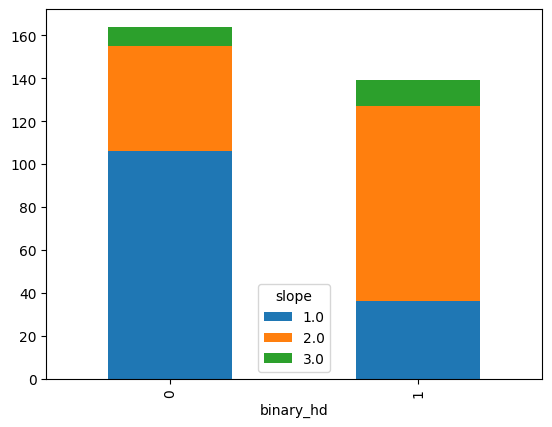

In [22]:
df.groupby(['binary_hd','slope'])['age'].count().unstack().plot(kind='bar', stacked=True)

In [23]:
cat_columns = ['sex', 'cp','fbs', 'restecg', 'thalach',
       'exang', 'slope', 'ca', 'thal']

In [25]:
X = df.iloc[:, :13]
y = df['binary_hd']

In [26]:
X_encoded = pd.get_dummies(X, columns=cat_columns, dtype=int)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

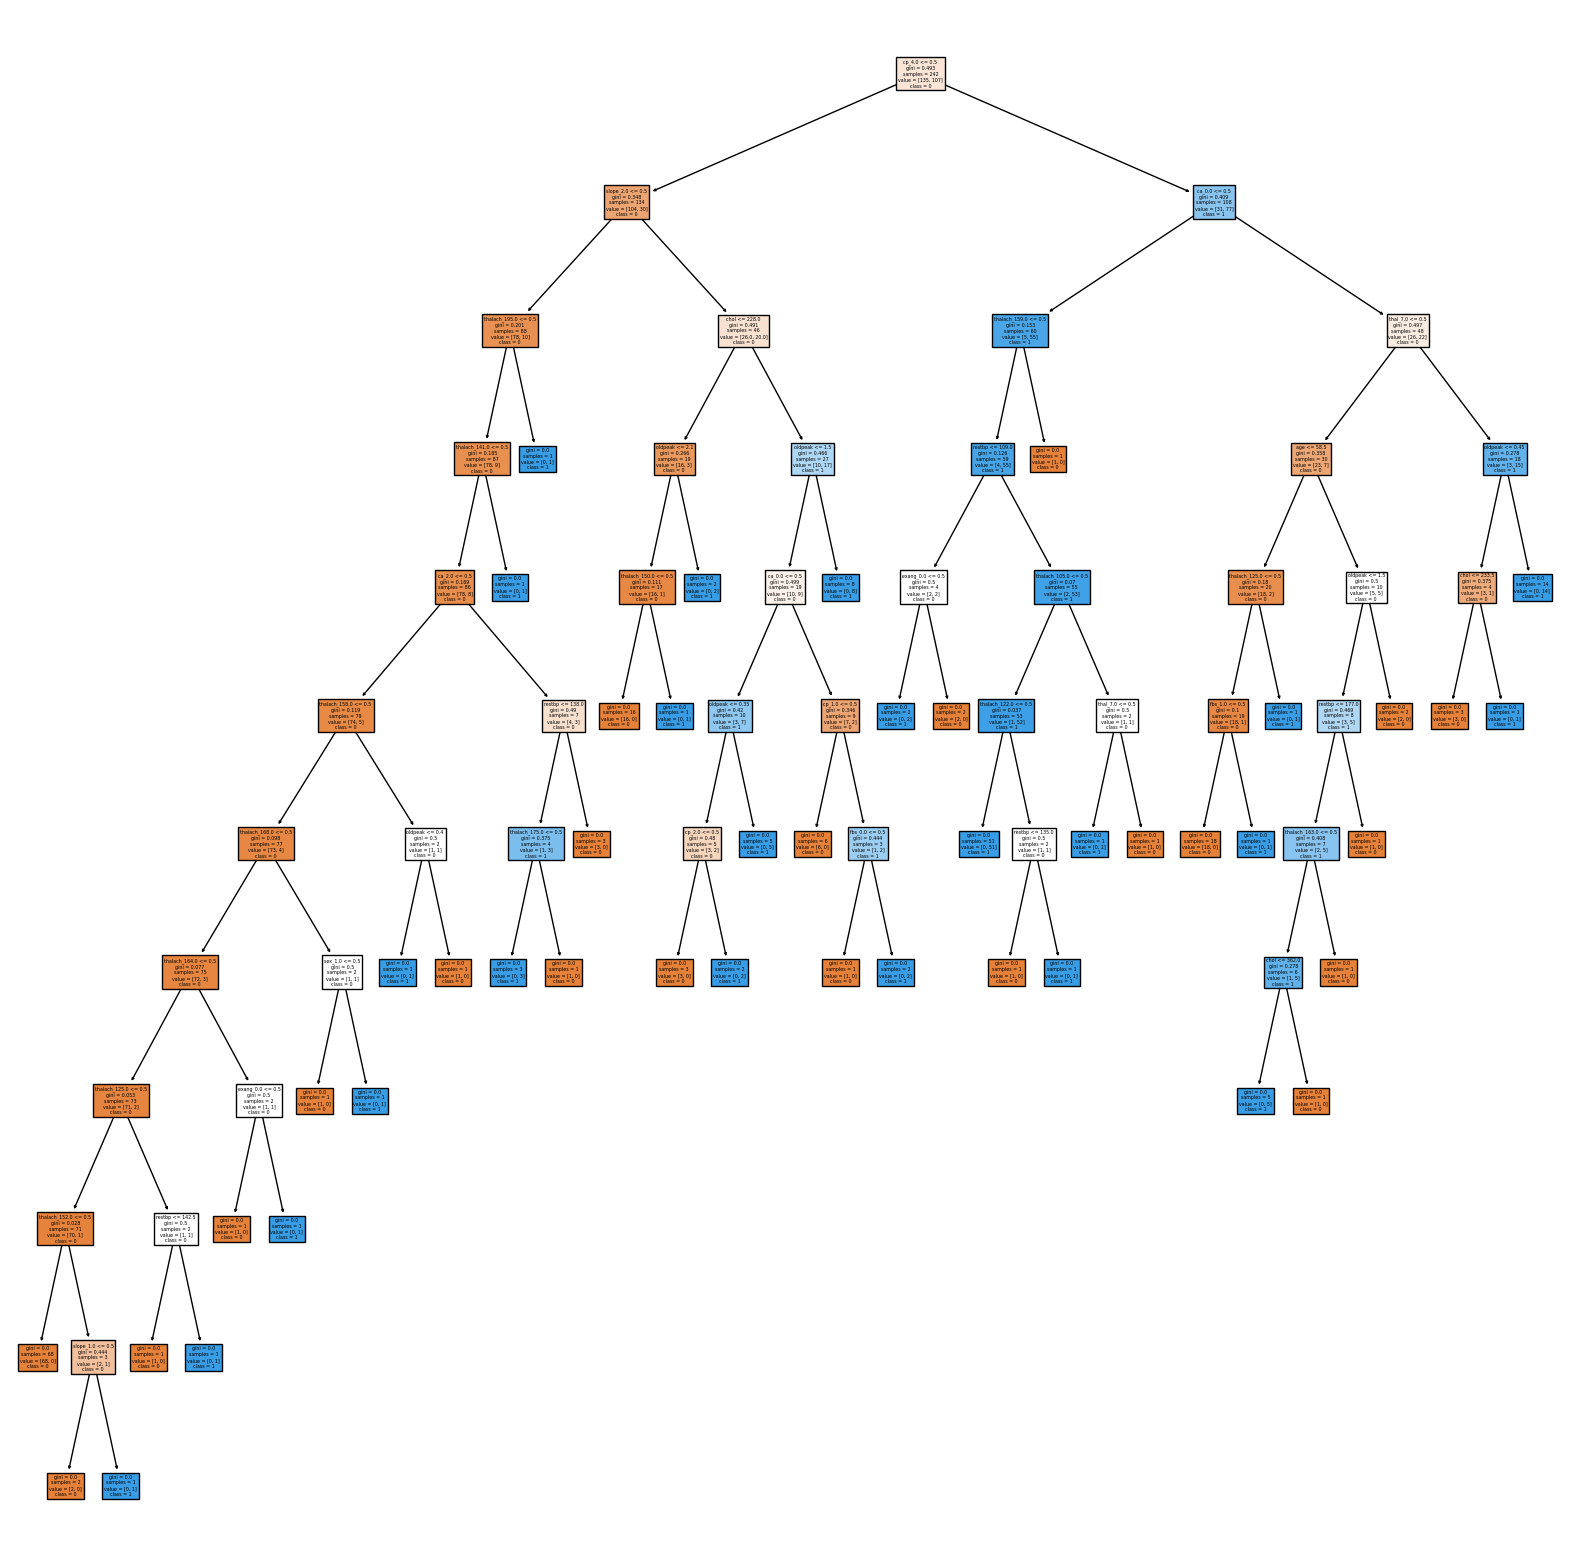

In [28]:
dt = DecisionTreeClassifier(random_state=123)
dt = dt.fit(X_train, y_train)
plt.figure(figsize=(20,20))
plot_tree(dt, filled=True, class_names=['0','1'], feature_names=X_encoded.columns);

In [29]:
pred_train1 = dt.predict(X_train)
pred_test1 = dt.predict(X_test)
print(accuracy_score(pred_train1, y_train))
print(accuracy_score(pred_test1, y_test))

1.0
0.7704918032786885


In [30]:
y2 = df['hd']

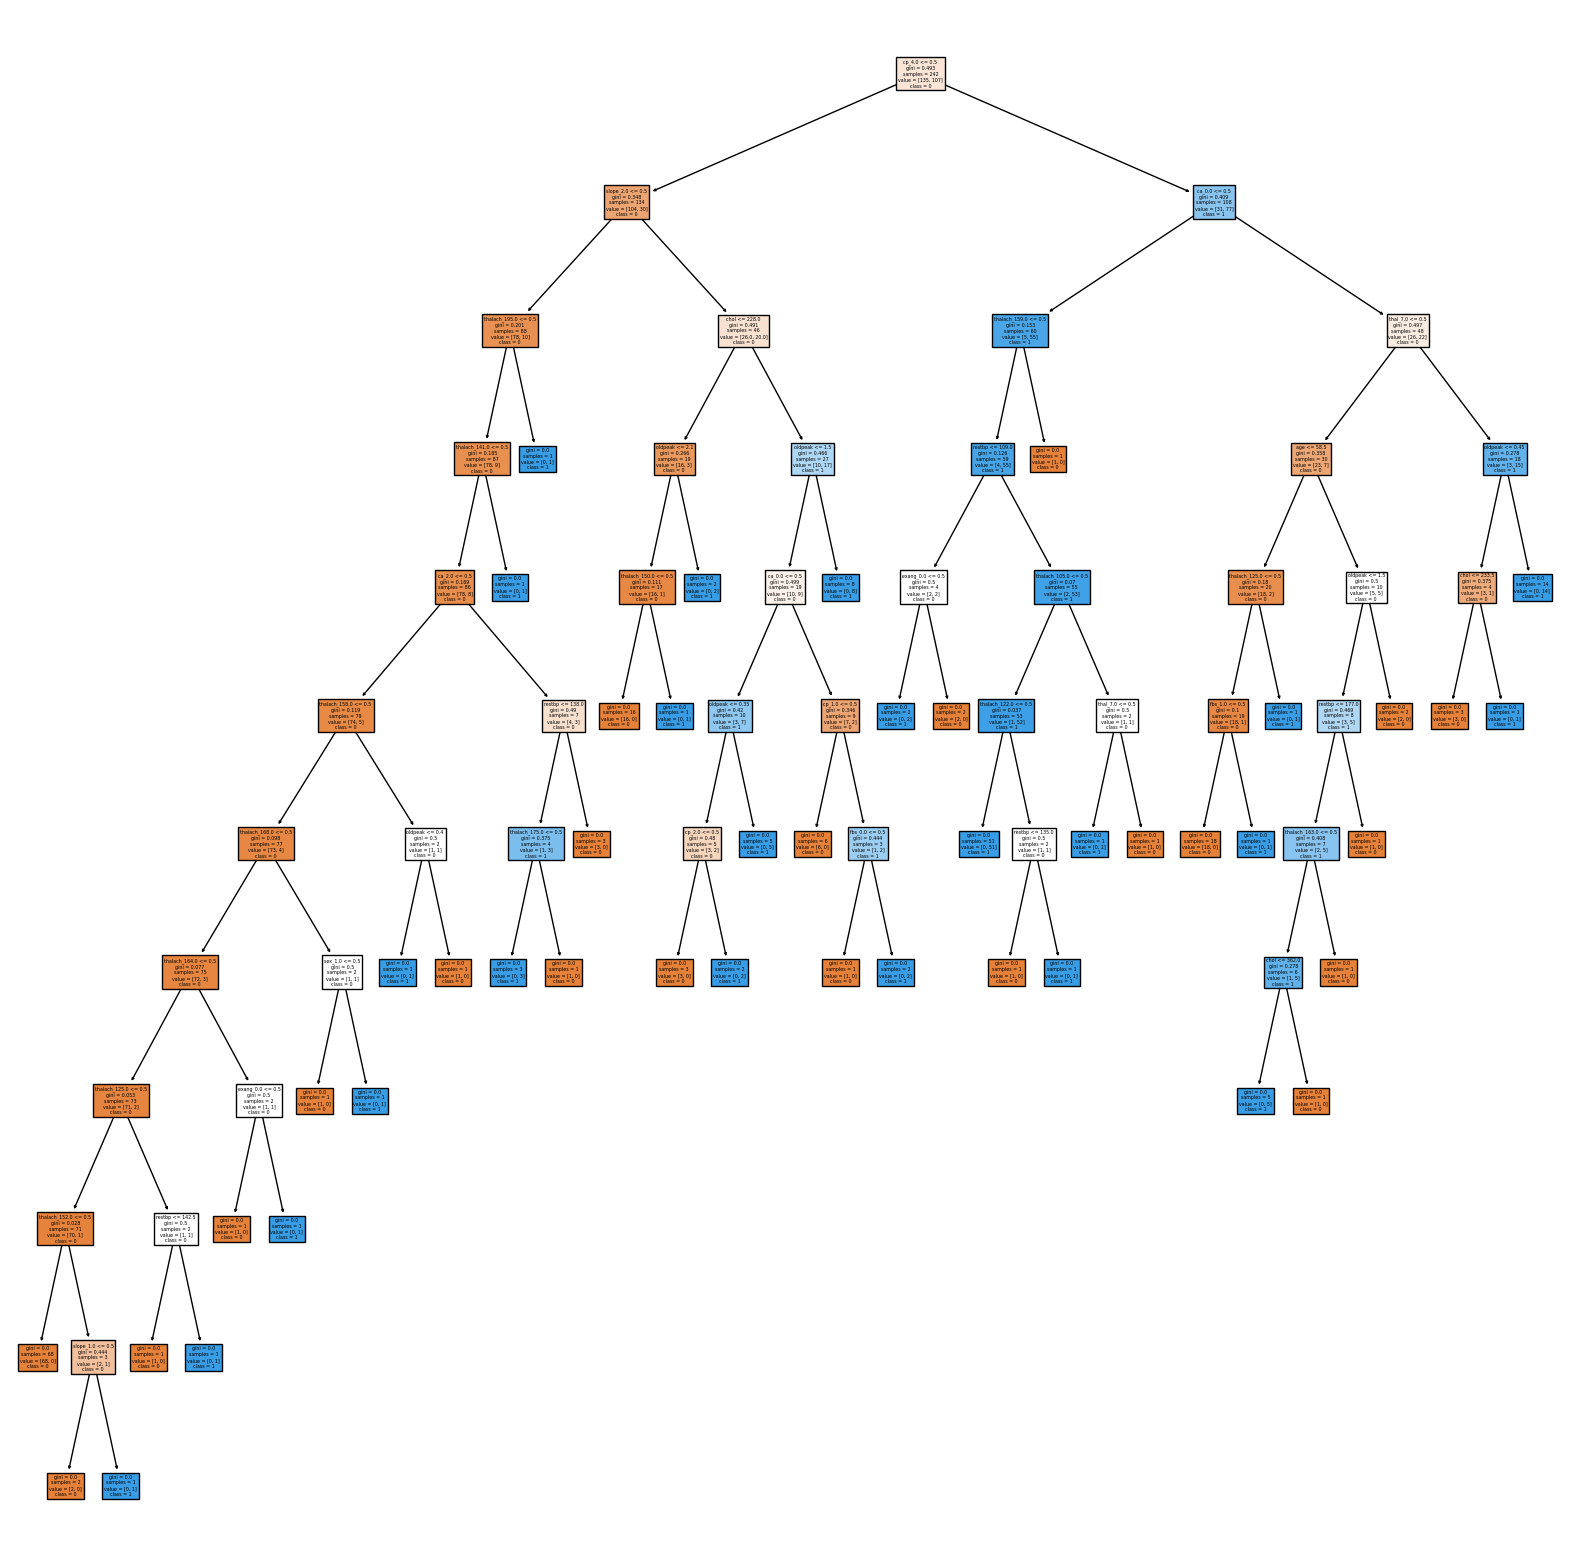

In [31]:
dt = DecisionTreeClassifier(random_state=123)
dt = dt.fit(X_train, y_train)
plt.figure(figsize=(20,20))
plot_tree(dt, filled=True, class_names=['0','1','2','3','4'], feature_names=X_encoded.columns);

In [32]:
pred_train1 = dt.predict(X_train)
pred_test1 = dt.predict(X_test)
print(accuracy_score(pred_train1, y_train))
print(accuracy_score(pred_test1, y_test))

1.0
0.7704918032786885


In [33]:
# optimizing for overfitting
# max_depth
# min_samples_split
# min_samples_leaf
params = {'max_depth':[2,4,6,8,10],
          'min_samples_split':[8,10,14,18,24],
          'min_samples_leaf':[4,8,12,16,20]}

In [34]:
random_search = RandomizedSearchCV(dt, params, cv=5, verbose=1, scoring='accuracy')

In [35]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
                   param_distributions={'max_depth': [2, 4, 6, 8, 10],
                                        'min_samples_leaf': [4, 8, 12, 16, 20],
                                        'min_samples_split': [8, 10, 14, 18,
                                                              24]},
                   scoring='accuracy', verbose=1)

In [37]:
grid_search = GridSearchCV(dt, params, cv=5, verbose=1, scoring='accuracy')
grid_search.fit(X_train,y_train)
print(grid_search.best_params_)

Fitting 5 folds for each of 125 candidates, totalling 625 fits
{'max_depth': 4, 'min_samples_leaf': 8, 'min_samples_split': 8}


0.8471074380165289
0.819672131147541


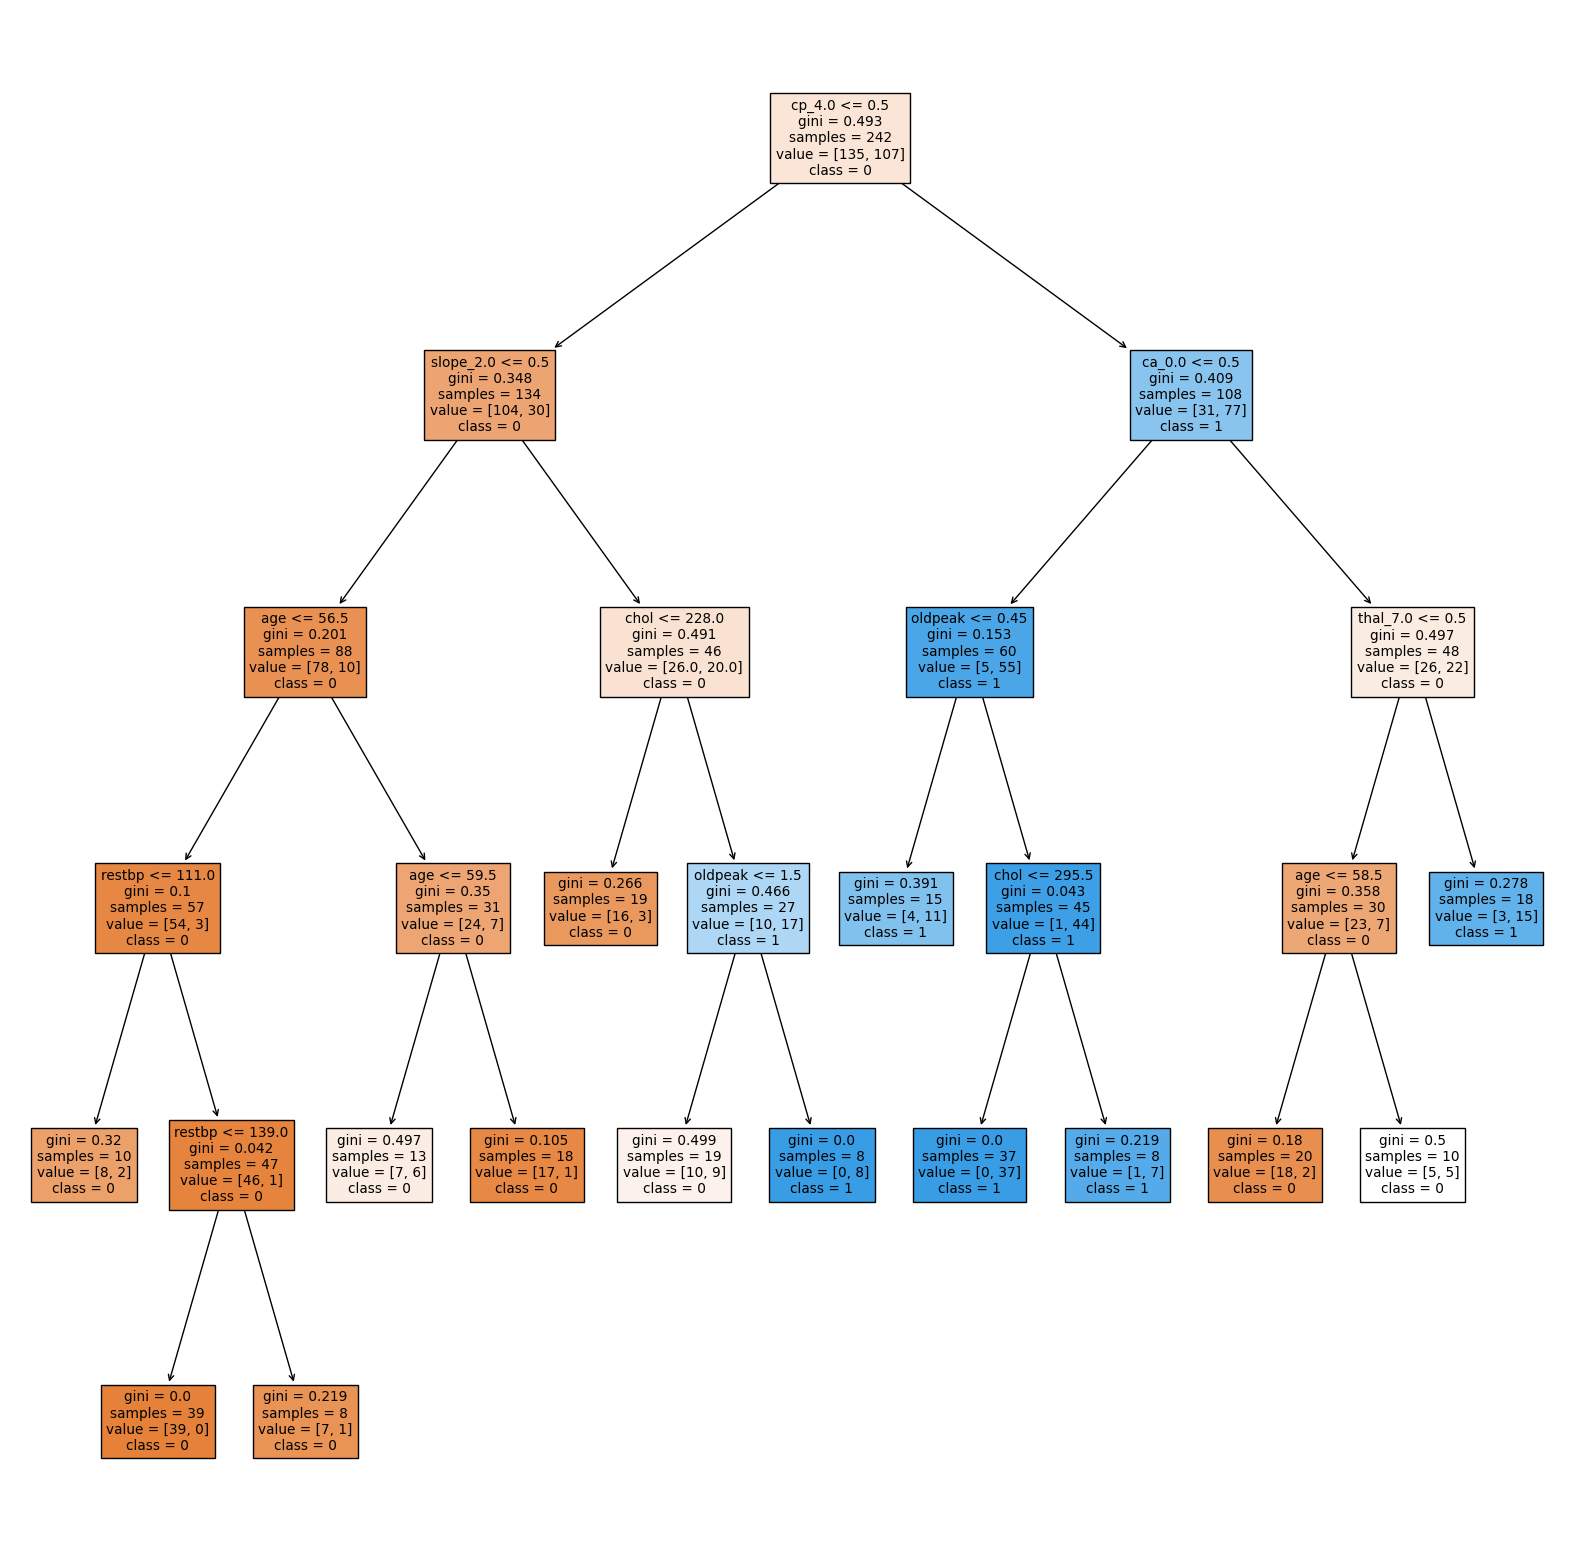

In [38]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, min_samples_split=24,random_state=123)
dt = dt.fit(X_train, y_train)
plt.figure(figsize=(20,20))
plot_tree(dt, filled=True, class_names=['0','1','2','3','4'], feature_names=X_encoded.columns);
pred_train1 = dt.predict(X_train)
pred_test1 = dt.predict(X_test)
print(accuracy_score(pred_train1, y_train))
print(accuracy_score(pred_test1, y_test))

0.8429752066115702
0.8032786885245902


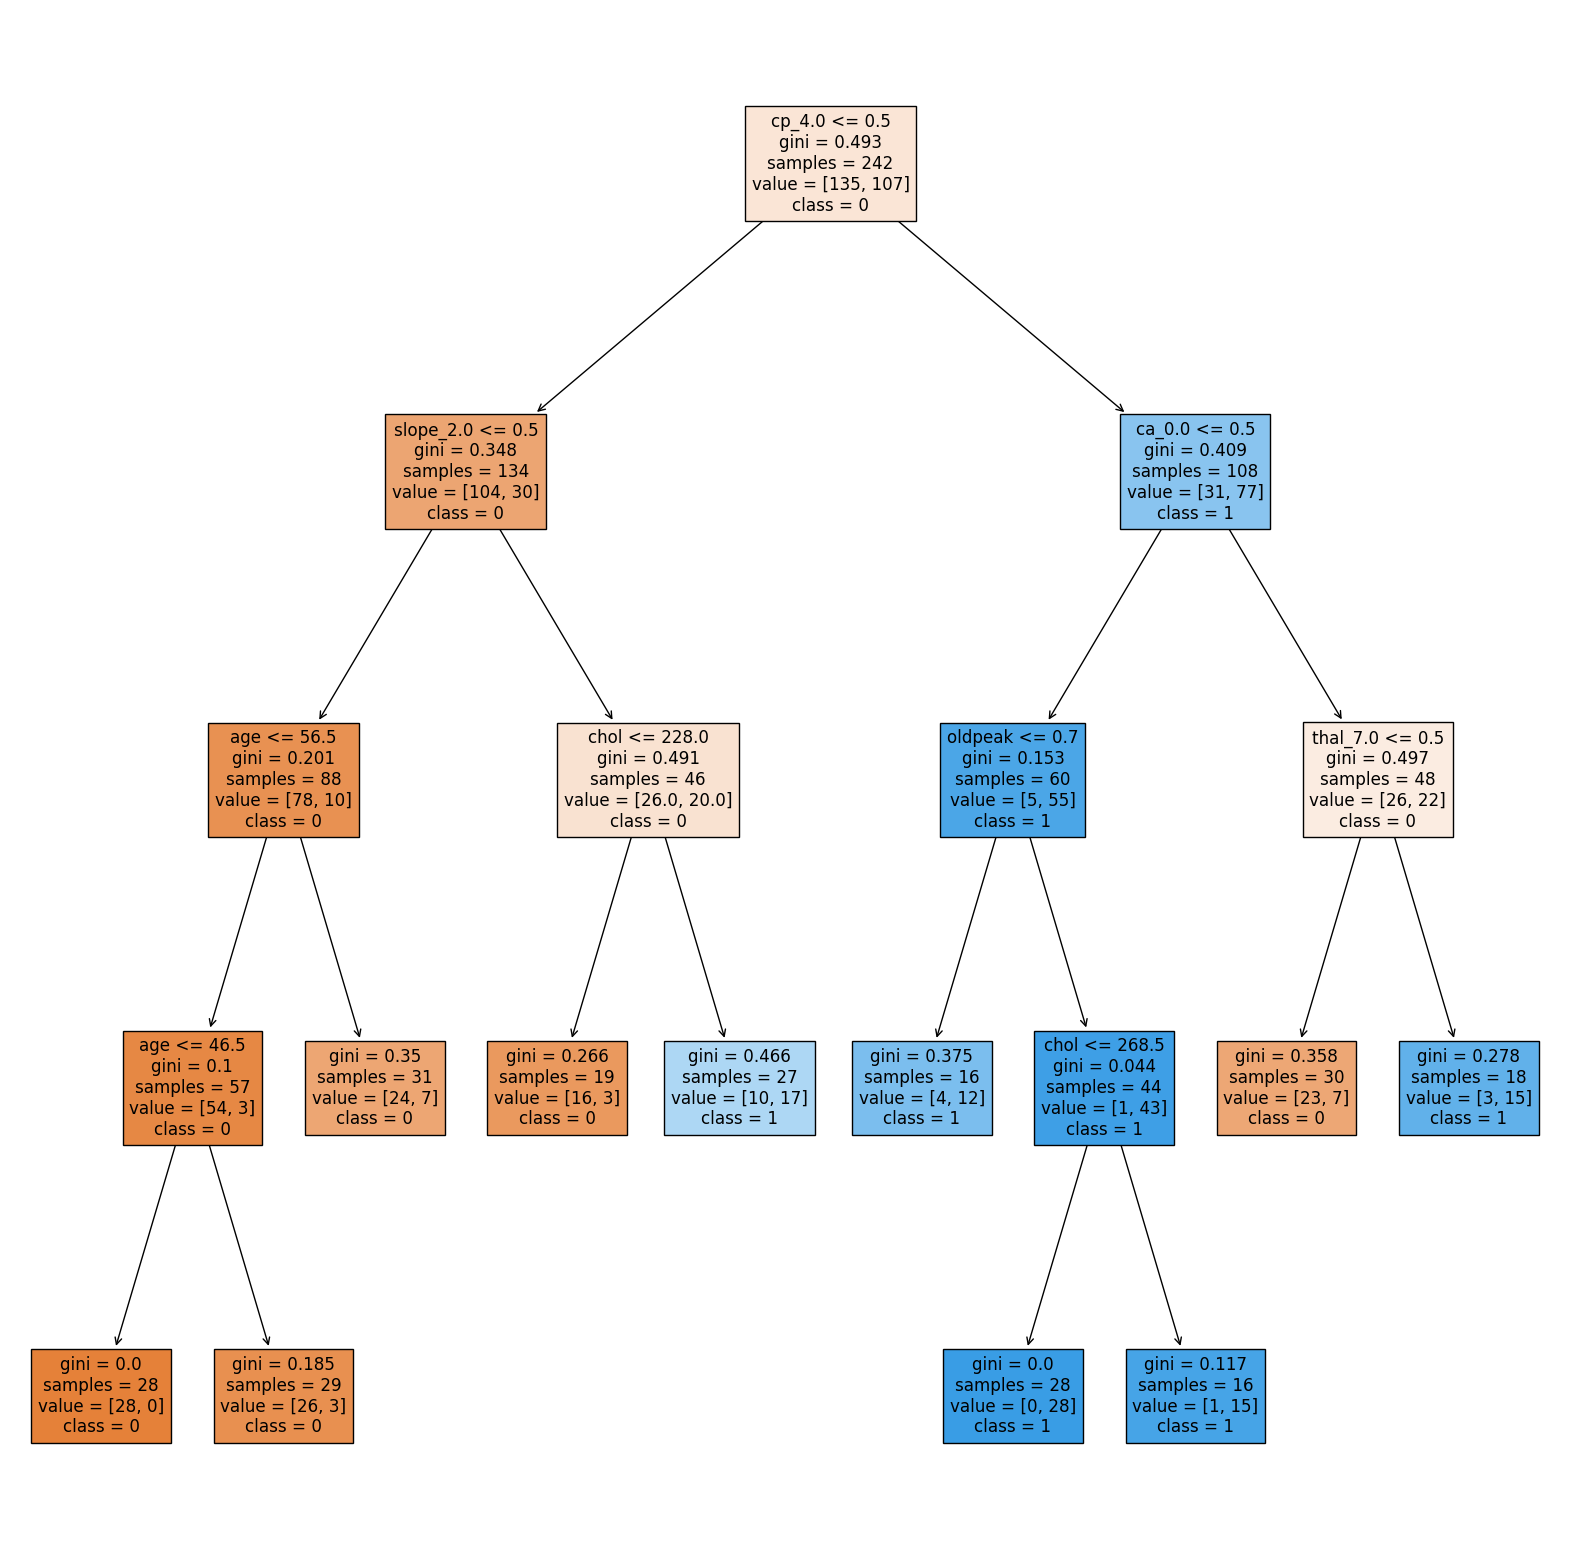

In [39]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=16, min_samples_split=8,random_state=123)
dt = dt.fit(X_train, y_train)
plt.figure(figsize=(20,20))
plot_tree(dt, filled=True, class_names=['0','1','2','3','4'], feature_names=X_encoded.columns);
pred_train1 = dt.predict(X_train)
pred_test1 = dt.predict(X_test)
print(accuracy_score(pred_train1, y_train))
print(accuracy_score(pred_test1, y_test))

0.8429752066115702
0.8032786885245902


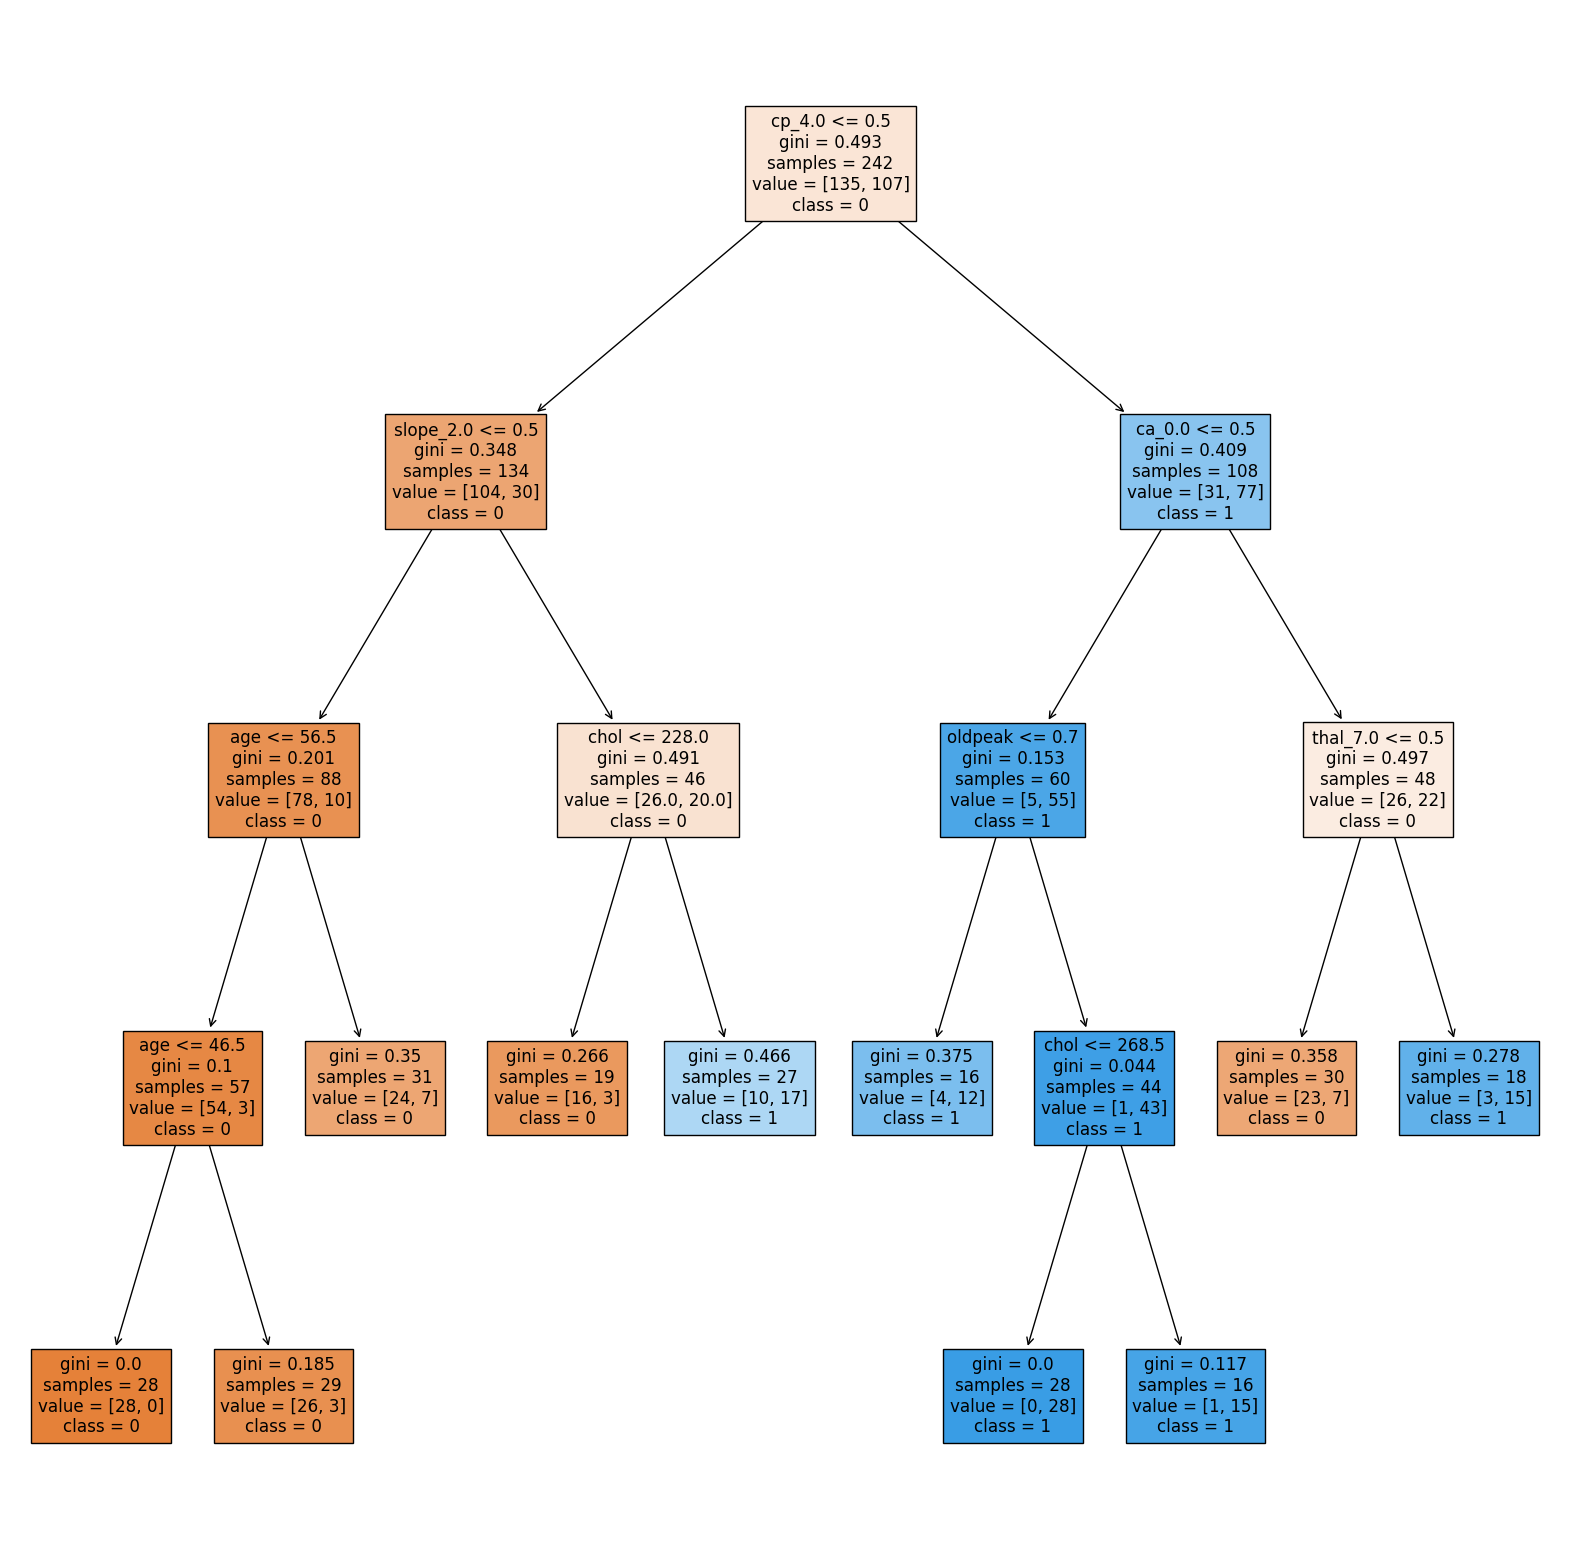

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=16, min_samples_split=8,random_state=123)
dt = dt.fit(X_train, y_train)
plt.figure(figsize=(20,20))
plot_tree(dt, filled=True, class_names=['0','1'], feature_names=X_encoded.columns);
pred_train1 = dt.predict(X_train)
pred_test1 = dt.predict(X_test)
print(accuracy_score(pred_train1, y_train))
print(accuracy_score(pred_test1, y_test))